In [121]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import NearestNeighbors

In [122]:
# Authors : Omar Sulaiman and Yasmine Fahraoui


#Always check the path to the CSV file, otherwise it won't read it

df = pd.read_csv("data_all.csv")


X = StandardScaler().fit_transform(df[['phi','psi']])

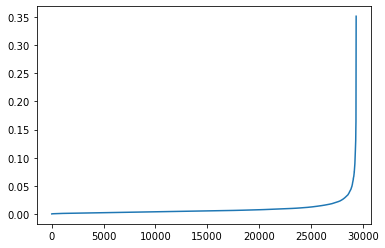

In [123]:
# Finding the best epsilon value
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


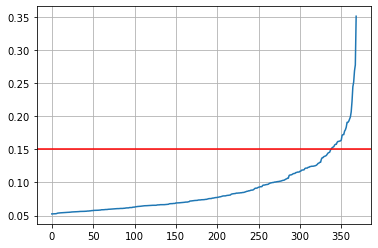

In [124]:
# Zooming in 
plt.plot(distances[29000:30000])
plt.grid()
plt.axhline(y=0.15, color='r', linestyle='-')


In [125]:
# Compute DBSCAN
db = DBSCAN(eps= 0.15, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 2640


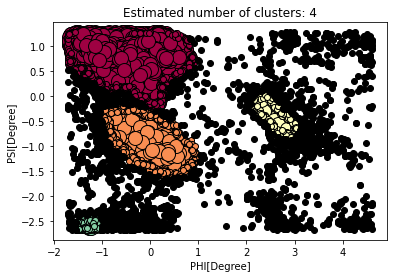

In [126]:
# Plot result for the clusters
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.xlabel("PHI[Degree]")
plt.ylabel("PSI[Degree]")
plt.show()

[ 0  0 -1 ...  0  1 -1]
      residue name  position chain         phi         psi  label
2              LYS        12     A -119.972621 -168.705263     -1
9              GLY        19     A   93.478288  -26.252796     -1
40             SER        50     A -161.204538 -149.176086     -1
56             ALA        66     A -142.535175 -144.336013     -1
69             ASN        80     A -112.064560 -174.177406     -1
...            ...       ...   ...         ...         ...    ...
29289          GLY       293     B  108.580759    6.090040     -1
29307          GLY       311     B   78.623741 -165.412896     -1
29328          GLY       332     B -169.931921 -165.965587     -1
29331          ALA       341     B  -34.237472   98.744502     -1
29368          LYS       378     B -169.951240   94.233680     -1

[2640 rows x 6 columns]
Nr of outliers in plot 2640


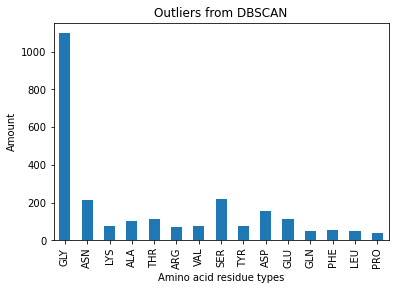

In [127]:
# Filter outliers
print(db.labels_)
df["label"] = db.labels_
dfOutlires = df[df.label==-1]
print(dfOutlires)

print(f"Nr of outliers in plot {dfOutlires.phi.count()}")

# Count the number of outlires
countRes["OutLires"] = dfOutlires["residue name"].value_counts().to_frame()


# Plot data
countRes["OutLires"].plot.bar()
plt.xlabel("Amino acid residue types")
plt.ylabel("Amount")
plt.title("Outliers from DBSCAN")
plt.show()



Text(0, 0.5, 'Psi [degree]')

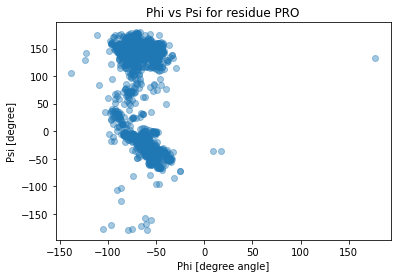

In [81]:
# Question 4
# residue type PRO

df_PRO = df.loc[df["residue name"] == "PRO"]
X = StandardScaler().fit_transform(df_PRO[['phi','psi']])

plt.scatter(df_PRO.loc[:,"phi"], df_PRO.loc[:,"psi"], alpha = 0.4)
plt.title("Phi vs Psi for residue PRO")
plt.xlabel("Phi [degree angle]")
plt.ylabel("Psi [degree]")


Text(0.5, 1.0, 'Epsilon value for PRO')

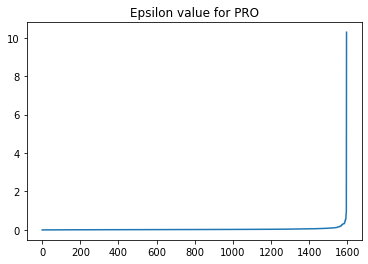

In [82]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title("Epsilon value for PRO")


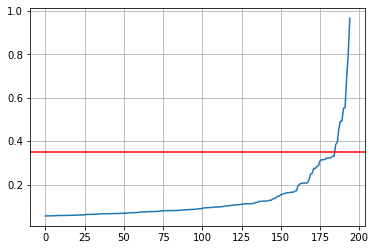

In [83]:
plt.plot(distances[1400:1595])
plt.grid()
plt.axhline(y=0.35, color='r', linestyle='-')

In [84]:
print("Epsilon is around 0.35 and min_sample is 100 as used before")

Epsilon is around 0.35 and min_sample is 100 as used before


In [85]:
# Compute DBSCAN
db = DBSCAN(eps= 0.35, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 249


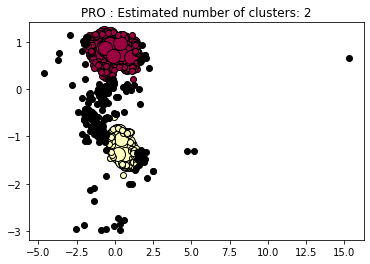

In [86]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('PRO : Estimated number of clusters: %d' % n_clusters_)
plt.show()

Text(0, 0.5, 'Psi [degree]')

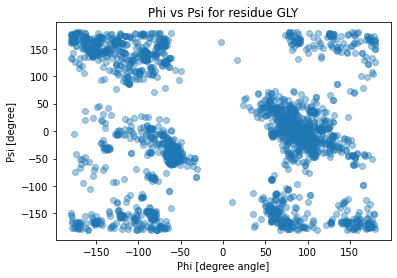

In [153]:
# residue type GLY
df_GLY = df.loc[df["residue name"] == "GLY"]
X = StandardScaler().fit_transform(df_GLY[['phi','psi']])

plt.scatter(df_GLY.loc[:,"phi"], df_GLY.loc[:,"psi"], alpha = 0.4)
plt.title("Phi vs Psi for residue GLY")
plt.xlabel("Phi [degree angle]")
plt.ylabel("Psi [degree]")




Text(0.5, 1.0, 'Epsilon value for GLY')

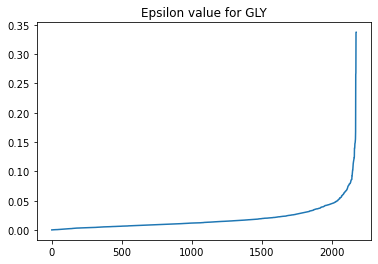

In [154]:
# Finding the best epsilon value for GLY
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title("Epsilon value for GLY")


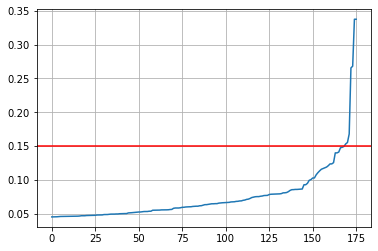

In [155]:
# Zooming in
plt.plot(distances[2000:2200])
plt.grid()
plt.axhline(y=0.15, color='r', linestyle='-')

In [156]:
print("Epsilon is around 0.15 and min_sample is 100 as used before")

Epsilon is around 0.15 and min_sample is 100 as used before


In [157]:
# Compute DBSCAN
db = DBSCAN(eps= 0.15, min_samples=50).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 7
Estimated number of noise points: 669


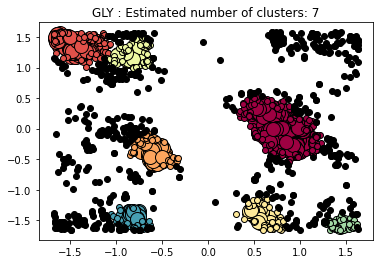

In [158]:
# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('GLY : Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
# Question 3 d, anaysing changes in values

In [146]:


# Compute DBSCAN
db = DBSCAN(eps= 0.15, min_samples=30).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("min samples = 30, epsilon = 0.15")
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

min samples = 30, epsilon = 0.15
Estimated number of clusters: 7
Estimated number of noise points: 976


In [147]:
# Compute DBSCAN
db = DBSCAN(eps= 0.45, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("min samples = 100, epsilon = 0.45")
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

min samples = 100, epsilon = 0.45
Estimated number of clusters: 4
Estimated number of noise points: 338
